<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Navarro Silva José Tonatiuh, Muñoz Pablo Humberto, Rodríguez Rodríguez Ana Esmeralda.

**Fecha:** 24 de Junio del 2021

**Expediente** : 722399, 719963 , 709288
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/if722399/Proyecto-SPF

# Proyecto TEMA-2

### 1.1 Título
## Niveles de CO2 emitidos por autos vendidos

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Pronosticar el promedio de los niveles de CO2 en relación con los autos vendidos

> #### 1.2 Objetivos específicos.  
>  - Proyectar el volúmen de ventas dependiendo el tipo de carro.
>  - Simular el comportamiento de las ventas totales.
>  - Estimar el cambio en la cantidad de CO2 a partir de los autos vendidos. 
>  - Analizar de forma gráfica las emisiones de C02 y los autos vendidos.

### 1.3 Definición del problema.
 
Vivimos en una ciudad donde la infraestructura está diseñada para el uso del carro. México es un país que se ha desarrollado en la industria del ensamblaje y producción de automoviles, siendo Estados Unidos uno de nuestros aliados comerciales más importantes, sin embargo existe la oportunidad de encontrar marcas de autos internacionales. Buscamos simular el impacto que tienen las ventas de autos, ya sean eléctricos, híbridos y de diesel en las emisiones de CO2.


Nuestro propósito con este proyecto es analizar la base de datos, obtener las distribuciones de probabilidad de cada variable de interés y asi poder realizar una conclusión acerca de la relación que existe entre las ventas de los 3 tipos de autos y la emisión de CO2.

Se utilizarán las siguientes variables: Promedio de $CO_2$, ventas de vehículos que usan diesel, ventas de vehículos que utilizan gasolina, ventas de vehículos que son híbridos, ventas de vehículos que son eléctricos.




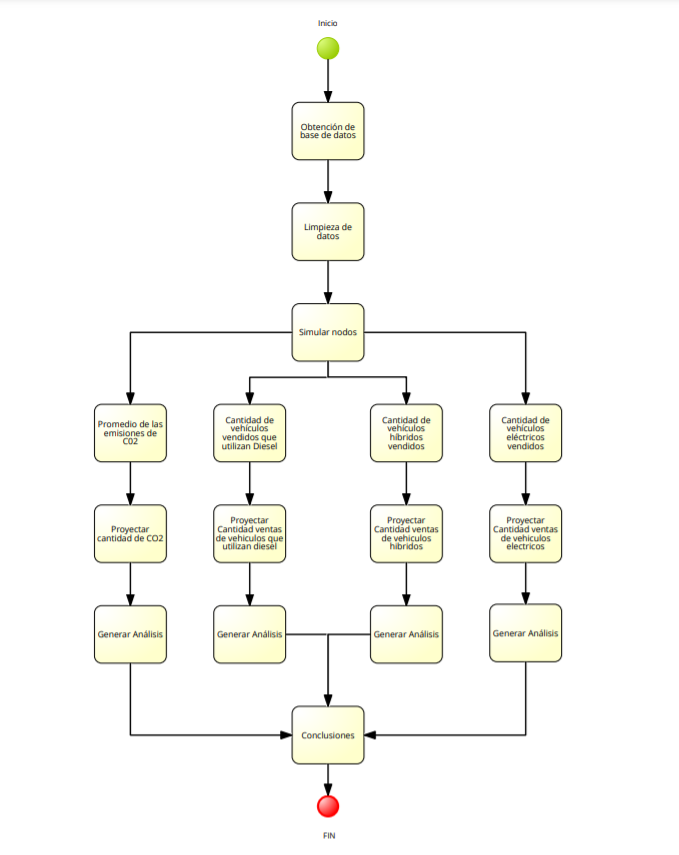

### 1.4 Nodos y variables que se decidieron simular y porqué

Los nodos que se han elegido para este proyecto es: 

>- Promedio de emisiones de $CO_2$ por mes.
>- Total de ventas de autos que usan Diesel.
>- Total de ventas de autos eléctricos.
>- Total de ventas de autos híbridos.

Se simula el volumen de ventas por auto para analizar como afecta el promedio de emisiones .

Al simular la Ventas de autos que usan Diesel podremos analizar los patrones en su venta.

El total de ventas de autos eléctricos nos dejará conocer la relacción en los aumentos de ventas de esta variable y la disminución de ventas de otro tipo de auto.

El total de ventas de autos híbridos permitirá determinar si las emisiones de gas tienen un incremento en la venta de este auto.

Al finalizar la simulación se podrán elegir los autos que presentan una mayor posibilidad de ventas para un inversionista.

### 1.5 Definición de hipótesis y supuestos.


Hipótesis:

- El volúmen de las emisiones de CO2 está altamente correlacionado con las ventas del tipo de auto.
- La probabilidad de que el promedio de CO2 esté por debajo de 90 g/km es del 60% .
- El vehículo que utilza diesel es el que se vende en mayor cantidad.
- El volúmen de las emisiones de CO2 va incrementando a lo largo del tiempo.


Supuestos: 

- Las emisiones de C02 no contemplan la producción de los vehículos.
- Los datos obtenidos son verídicos.
- El total de números de carros que utilizan gasolina se presenta como la diferencia entre total de ventas y las ventas de los 3 tipos de carros.
- Las unidades en las que se presenta la cantidad de CO2 es de g/km (gramos por kilómetro).

### 1.6 Obtención de bases de datos

La base de datos se obtuvo del siguiente enlace: https://www.kaggle.com/dmi3kno/newcarsalesnorway?select=norway_new_car_sales_by_month.csv, la cual se encuentra en el sitio de Kaggle, sitio web diseñado para proporcionar una gran catidad de data sets con propósitos académicos.

La base de datos nos proporciona variables de utilidad para poder pronosticar la cantidad de  



In [2]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# Limpieza de datos

data = pd.read_csv('norway_new_car_sales_by_month.csv')

data = data.iloc[:,[0,1,2,8,11,14,15]]
data.set_index('Year', inplace=True)
data.fillna(0, inplace = True)
data['Quantity_Bensin'] = data['Quantity']- data['Quantity_Diesel'] - data['Quantity_Hybrid'] - data['Quantity_Electric']

data.tail()

,Month,Quantity,Avg_CO2,Quantity_Diesel,Quantity_Hybrid,Quantity_Electric,Quantity_Bensin
Year,,,,,,,
2016,9,13854,88,3838,3991.0,2629.0,3396.0
2016,10,11932,91,3544,3209.0,1861.0,3318.0
2016,11,13194,88,3892,3181.0,2567.0,3554.0
2016,12,13602,98,4829,2597.0,2319.0,3857.0
2017,1,13055,84,3433,4419.0,2295.0,2908.0



### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>